In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [2]:
df=pd.read_csv("crime_data.csv")

In [3]:
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.shape

(50, 5)

In [5]:
#normalization Function
def norm_func(i):
    x=(i-i.mean()/i.std())
    return x

In [6]:
#Normalizing the data except one column 
df_norm=norm_func(df.iloc[:,1:])

In [7]:
type(df_norm)

pandas.core.frame.DataFrame

In [8]:
z=linkage(df_norm,method="complete", metric="euclidean")

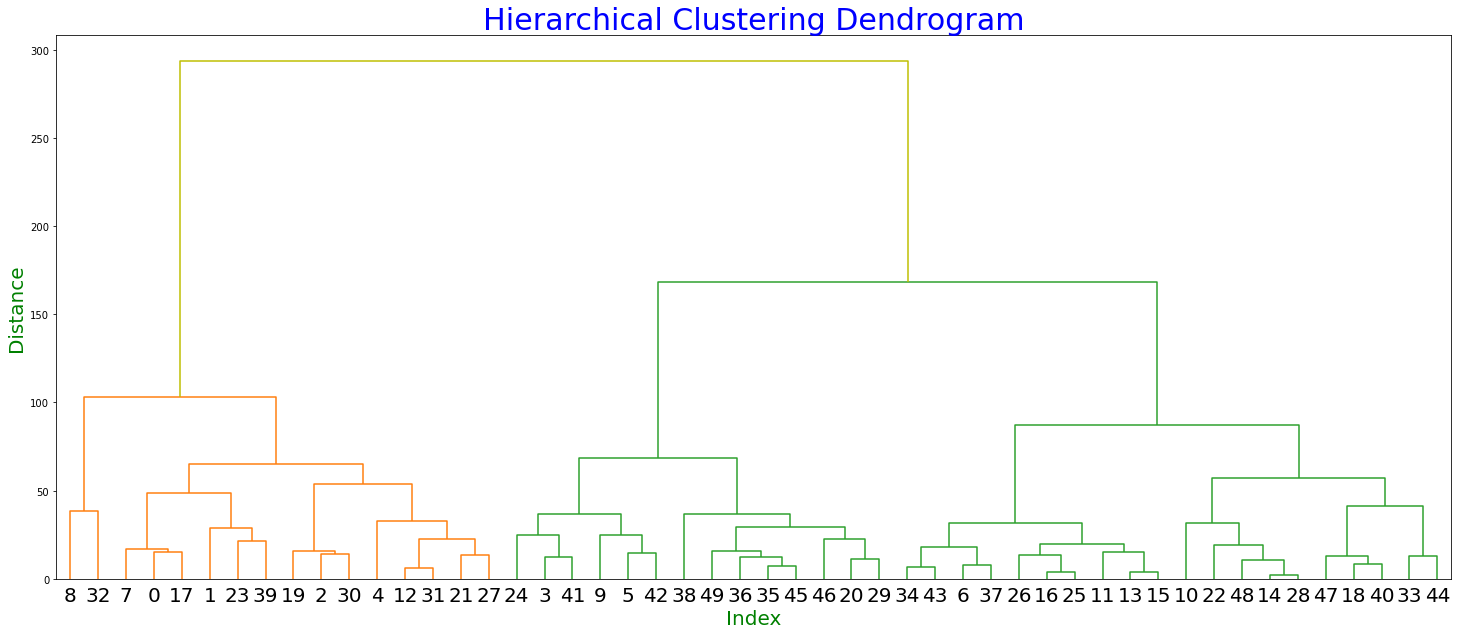

In [41]:
# Creating the dendrogram
plt.figure(figsize=(25,10));
plt.title('Hierarchical Clustering Dendrogram',fontsize=30,color='blue');
plt.xlabel('Index',fontsize=20,color='green');
plt.ylabel('Distance',fontsize=20,color='green')
sch.dendrogram(
    z,
    above_threshold_color= 'y',
    distance_sort = 'ascending',
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=20,  # font size for the x axis labels 
)
plt.show()

In [10]:
#Defining the clusters
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete").fit(df_norm)
clusters_labels=pd.Series(model.labels_)
df["Clusters"]=clusters_labels
df=df.iloc[:,[0,1,2,3,4,5]]

In [11]:
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [12]:
#Median 
df.iloc[:,2:].groupby(df.Clusters).median()

,Assault,UrbanPop,Rape,Clusters
Clusters,,,,
0,94.0,59.5,14.55,0.0
1,257.0,71.0,26.95,1.0
2,167.5,69.0,23.10,2.0
3,336.0,62.5,24.00,3.0


In [13]:
#importing to csv
df.to_csv("crime_data_cluster.csv",encoding="utf-8")